In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, assemble, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit import ClassicalRegister, QuantumRegister, AncillaRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
sim = Aer.get_backend('aer_simulator') 
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [ ]:
#Right most top processing element, Cell0;0

qr1 = QuantumRegister(1, 'a0')
qr6 = QuantumRegister(1, 'b0')
cr = ClassicalRegister(3, 'zx_meas')
#initial_state1 = [0,1]  # Define initial_state as |1>
#initial_state2 = [1,0]  # Define initial_state as |0>
ar1 = AncillaRegister(1, 'ancilla(0)')

qc = QuantumCircuit(qr1, qr6, ar1, cr)
#qc.initialize(initial_state1, 0) # Apply initialisation operation to the 0th qubit
#qc.initialize(initial_state2, 1) # Apply initialisation operation to the 1st qubit
qc.x(0)
qc.x(1)
qc.barrier()
qc.ccx(0,1,2)
qc.barrier()
qc.measure(2,1)
qc.barrier()
qc.draw()


In [28]:
print("Circuit depth: ", qc.depth())

Circuit depth:  3


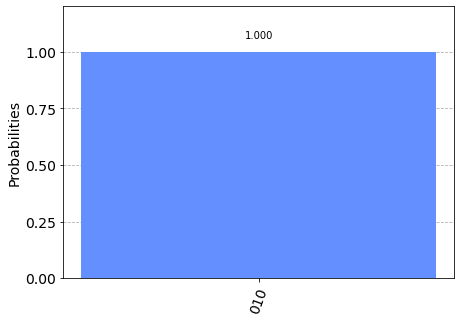

In [29]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)


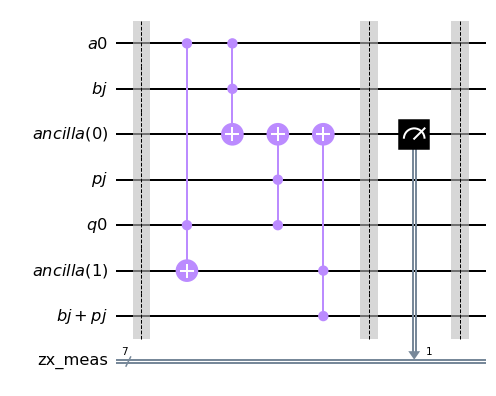

In [15]:
#Top processing element
qr2 = QuantumRegister(1, 'bj')
qr3 = QuantumRegister(1, 'pj')
qr4 = QuantumRegister(1, 'q0')
qr5 = QuantumRegister(1, 'bj+pj')
ar2 = AncillaRegister(1, 'ancilla(1)')
cr1 = ClassicalRegister(7, 'zx_meas')

qc1 = QuantumCircuit(qr1, qr2, ar1, qr3, qr4, ar2, qr5, cr1)

qc1.barrier()
qc1.ccx(0,4,5)
qc1.ccx(0,1,2)
qc1.ccx(3,4,2)
qc1.ccx(5,6,2)
qc1.barrier()
qc1.measure(2,1)
qc1.barrier()
qc1.draw()

In [16]:
print("Circuit depth: ", qc1.depth())

Circuit depth:  5


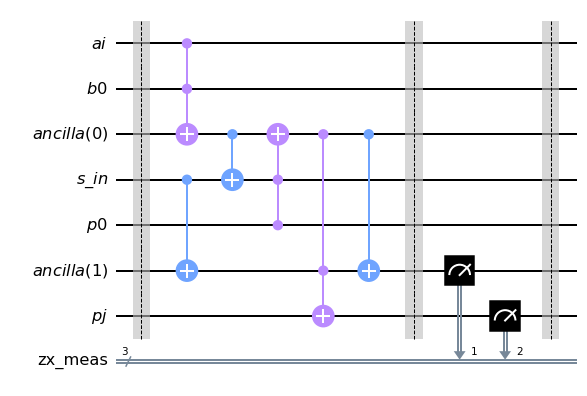

In [17]:
# Right border processing elements, Cell1;0–Celln1;0

qr7 = QuantumRegister(1, 'ai')
qr8 = QuantumRegister(1, 's_in')
qr9 = QuantumRegister(1, 'p0')
ar3 = AncillaRegister(1, 'ancilla(2)')
cr2 = ClassicalRegister(3, 'zx_meas')
qc2 = QuantumCircuit(qr7, qr6, ar1, qr8, qr9, ar2, qr3, cr2)

qc2.barrier()
qc2.ccx(0,1,2)
qc2.cx(3,5)
qc2.cx(2,3)
qc2.ccx(3,4,2)
qc2.ccx(2,5,6) #combining ccx and cx gate to form peres gate 
qc2.cx(2,5)  #combining ccx and cx gate to form peres gate 
qc2.barrier()
qc2.measure(5,1) #measuring Sout
qc2.measure(6,2) #measuring Cout
qc2.barrier()
qc2.draw()

In [18]:
print("Circuit depth: ", qc2.depth())

Circuit depth:  6


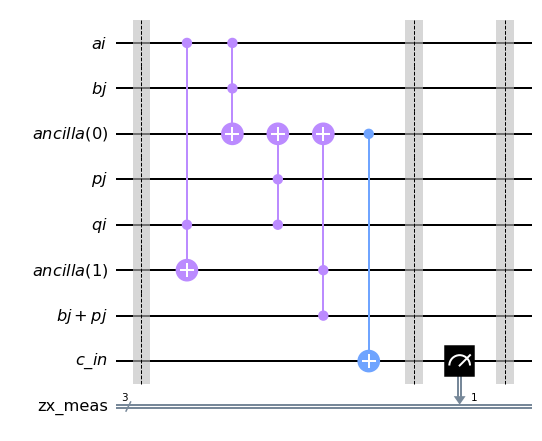

In [19]:
#Left border processing element

qr10 = QuantumRegister(1, 'qi')
qr11 = QuantumRegister(1, 'c_in')
cr3 = ClassicalRegister(3, 'zx_meas')
qc3 = QuantumCircuit(qr7, qr2, ar1, qr3, qr10, ar2, qr5, qr11, cr3)

qc3.barrier()
qc3.ccx(0,4,5)
qc3.ccx(0,1,2)
qc3.ccx(3,4,2)
qc3.ccx(5,6,2)
qc3.cx(2,7)
qc3.barrier()
qc3.measure(7,1)
qc3.barrier()
qc3.draw()

In [21]:
print("Circuit depth: ", qc3.depth())

Circuit depth:  6


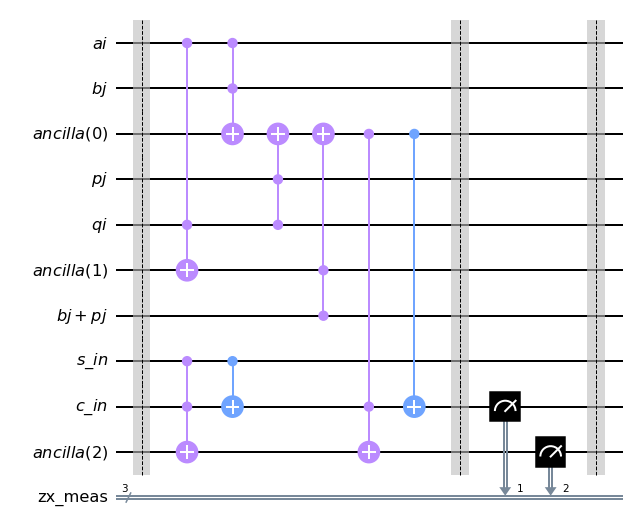

In [30]:
#  Main processing element
cr4 = ClassicalRegister(3, 'zx_meas')
qc4 = QuantumCircuit(qr7, qr2, ar1, qr3, qr10, ar2, qr5, qr8, qr11, ar3, cr4)

qc4.barrier()
qc4.ccx(0,4,5)
qc4.ccx(7,8,9)
qc4.cx(7,8)

qc4.ccx(0,1,2)
qc4.ccx(3,4,2)
qc4.ccx(5,6,2)
qc4.ccx(2,8,9)
qc4.cx(2,8)
qc4.barrier()
qc4.measure(8,1)   #measuring Sout
qc4.measure(9,2)   #measuring Cout
qc4.barrier()
qc4.draw()


In [23]:
print("Circuit depth: ", qc4.depth())

Circuit depth:  7
